In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('dataset_SCL.csv')

c:\Users\Марія\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3257: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<h3> Exploratory Data Analysis </h3>

In [48]:
data.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


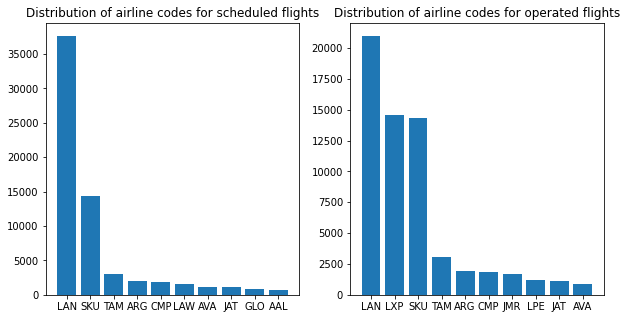

In [109]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(data['Emp-I'].value_counts().index.tolist()[:10], data['Emp-I'].value_counts().values.tolist()[:10]) 
axs[1].bar(data['Emp-O'].value_counts().index.tolist()[:10], data['Emp-O'].value_counts().values.tolist()[:10])

axs[0].set_title("Distribution of airline codes for scheduled flights")

axs[1].set_title("Distribution of airline codes for operated flights")


plt.show()

In [136]:
mask = (data['Emp-I']=='LAN') & ((data['Emp-O'] =='LXP'))
filtered = data.loc[mask]
filtered.shape

(14549, 18)

In [137]:
mask = (data['Emp-I']=='LAN') & ((data['Emp-O'] =='SKU'))
filtered = data.loc[mask]
filtered.shape

(0, 18)

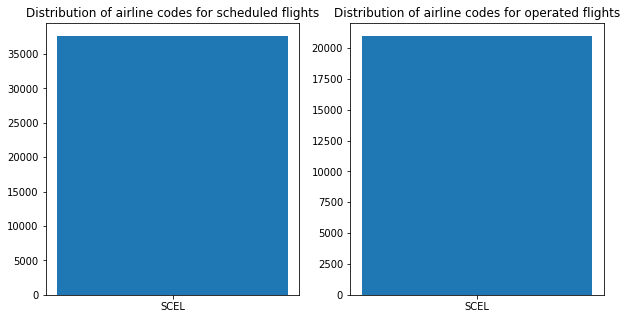

In [110]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(data['Ori-I'].value_counts().index.tolist()[:10], data['Emp-I'].value_counts().values.tolist()[:10]) 
axs[1].bar(data['Ori-O'].value_counts().index.tolist()[:10], data['Emp-O'].value_counts().values.tolist()[:10])

axs[0].set_title("Distribution of origin city codes for scheduled flights")

axs[1].set_title("Distribution of origin city codes for operated flights")


plt.show()

C:\Users\Марія\AppData\Local\Temp\ipykernel_7432\3102475208.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(data['Des-I'].value_counts().index.tolist()[:10], rotation=45)
C:\Users\Марія\AppData\Local\Temp\ipykernel_7432\3102475208.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(data['Des-O'].value_counts().index.tolist()[:10], rotation=45)


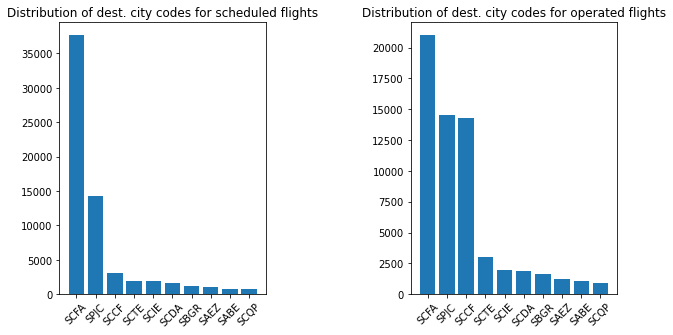

In [118]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.7)
axs[0].bar(data['Des-I'].value_counts().index.tolist()[:10], data['Emp-I'].value_counts().values.tolist()[:10]) 
axs[1].bar(data['Des-O'].value_counts().index.tolist()[:10], data['Emp-O'].value_counts().values.tolist()[:10])

axs[0].set_title("Distribution of dest. city codes for scheduled flights")

axs[1].set_title("Distribution of dest. city codes for operated flights")

axs[0].set_xticklabels(data['Des-I'].value_counts().index.tolist()[:10], rotation=45)
axs[1].set_xticklabels(data['Des-O'].value_counts().index.tolist()[:10], rotation=45)
plt.show()

Text(0.5, 1.0, 'Top-10 airlines')

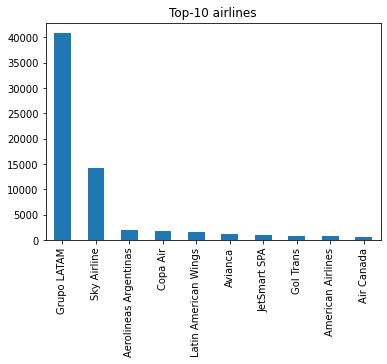

In [151]:
data['OPERA'].value_counts()[:10].plot(kind='bar')
plt.title('Top-10 airlines')

Text(0.5, 1.0, 'Distribution of types of flights')

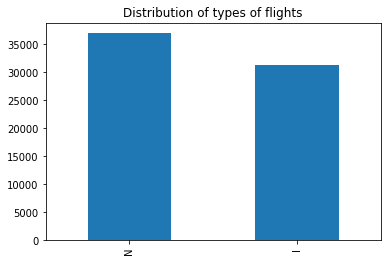

In [150]:
data['TIPOVUELO'].value_counts().plot(kind='bar')
plt.title('Distribution of types of flights')

In [7]:
data['SIGLAORI'].value_counts()

Santiago    68206
Name: SIGLAORI, dtype: int64

Text(0.5, 1.0, 'Top-20 destinations')

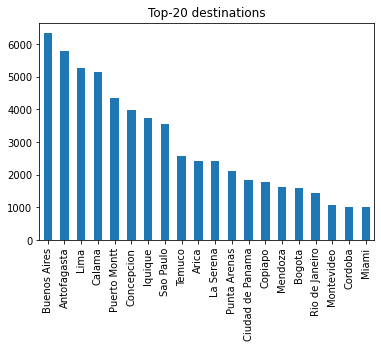

In [149]:
data['SIGLADES'].value_counts()[:20].plot(kind='bar')
plt.title('Top-20 destinations')

Text(0.5, 1.0, 'Distribution of months for flights')

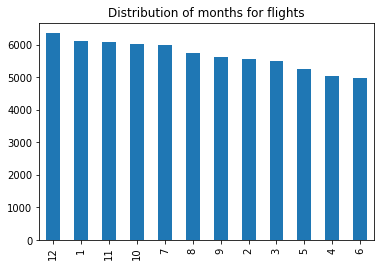

In [148]:
data['MES'].value_counts().plot(kind='bar')
plt.title('Distribution of months for flights')

Text(0.5, 1.0, 'Distribution of days for flights')

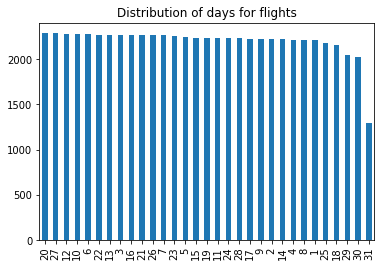

In [147]:
data['DIA'].value_counts().plot(kind='bar')
plt.title('Distribution of days for flights')

In [49]:
data['Fecha-I'] = pd.to_datetime(data['Fecha-I'])
data['Fecha-O'] = pd.to_datetime(data['Fecha-O'])

In [54]:
def time_of_year(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month < 8:
        return 'Summer'
    elif 9 <= month < 11:
        return 'Autumn'
    else:
        return 'Winter'

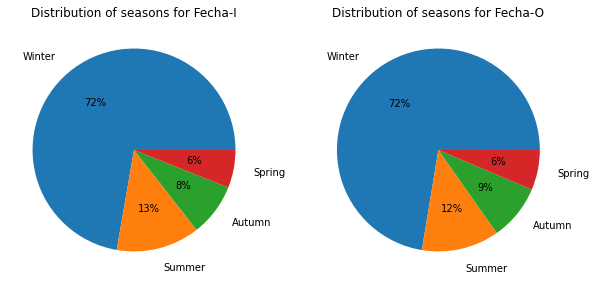

In [90]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

time_of_the_year1 = data['Fecha-I'].apply(lambda x: time_of_year(x.hour))
axs[0].pie(time_of_the_year1.value_counts(), labels=list(time_of_the_year1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

time_of_the_year2 = data['Fecha-O'].apply(lambda x: time_of_year(x.hour))
axs[1].pie(time_of_the_year2.value_counts(), labels=list(time_of_the_year1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

axs[0].set_title("Distribution of seasons for Fecha-I")

axs[1].set_title("Distribution of seasons for Fecha-O")


plt.show()


In [124]:
def time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 19:
        return 'afternoon'
    else:
        return 'night'

Text(0.5, 1.0, 'Distribution of hours for scheduled flights')

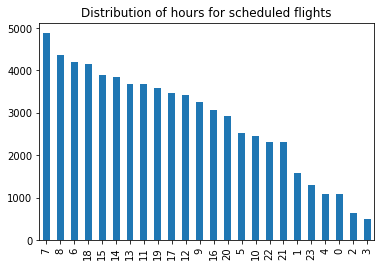

In [146]:
time = data['Fecha-I'].apply(lambda x: x.hour)
time.value_counts().plot(kind='bar')
plt.title('Distribution of hours for scheduled flights')

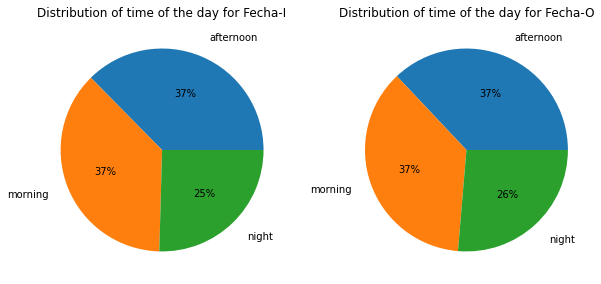

In [125]:
fig, axs1 = plt.subplots(1, 2, figsize=(10, 5))

time_of_the_day1 = data['Fecha-I'].apply(lambda x: time_of_day(x.hour))
axs1[0].pie(time_of_the_day1.value_counts(), labels=list(time_of_the_day1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

time_of_the_day2 = data['Fecha-O'].apply(lambda x: time_of_day(x.hour))
axs1[1].pie(time_of_the_day2.value_counts(), labels=list(time_of_the_day1.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%') 

axs1[0].set_title("Distribution of time of the day for Fecha-I")

axs1[1].set_title("Distribution of time of the day for Fecha-O")


plt.show()

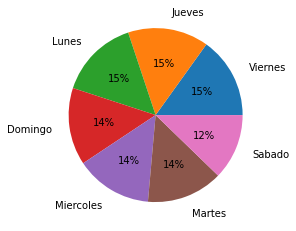

In [121]:
time_of_the_week = data['DIANOM']
frame1 = time_of_the_week.value_counts().plot(kind='pie', labels=list(time_of_the_week.value_counts().keys()), labeldistance=1.2, autopct='%1.0f%%')
frame1.axes.get_yaxis().set_visible(False) 

<h5> Conclusion </h5>

<ul>
  <li>LAN is the most popular airline code for both scheduled and operated flights. Most of the scheduled flights had to be organized by airlines with codes LAN and SKU.
In reality, operated flights were organized by airlines with codes LAN, LXP and SKU which leads to the conclusion that some part of the LAN flights was delayed and was organized by LXP or SKU (14549 flights were organized by LXP)  </li>
  <li>The origin city code is SCEL for both scheduled and operated flights.</li>
  <li>SCFA is the most popular destination city code for both scheduled and operated flights. For operated flights, SPJC and SCCF were also popular destinations.</li>
  <li>Most of the flights were organized by Group LATAM.</li>
  <li>Types of lights are evenly distributed.</li> 
<li>Origin of all flights is Santiago.</li> 
<li>Winter is the most popular season for flights.</li>
<li>Time of the day is evenly distributed, though more flights happened either in the morning or in the afternoon.</li> 
<li>Quantity of flights is evenly distributed across all days of the week. Fewer flights happened on Saturday.</li> 
</ul>

<h3> Generate new columns </h3>

In [175]:
from datetime import date

date1 = pd.to_datetime(date(2017, 12, 15))
date2 = pd.to_datetime(date(2017, 3, 3))
date3 = pd.to_datetime(date(2017, 7, 15))
date4 = pd.to_datetime(date(2017, 7, 31))
date5 = pd.to_datetime(date(2017, 9, 11))
date6 = pd.to_datetime(date(2017, 9, 30))

def is_high_season(date_input):
    return (date1 <= date_input <= date2) or (date3 <= date_input <= date4) or (date5 <= date_input <= date6)

In [176]:
data['high_season'] = data['Fecha-I'].apply(lambda x: is_high_season(pd.to_datetime(date(2017, x.month, x.day))))

<AxesSubplot:>

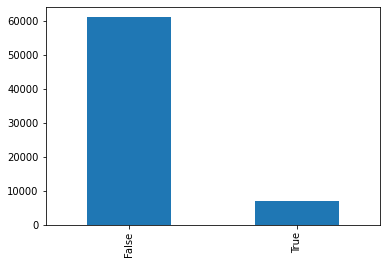

In [178]:
data['high_season'].value_counts().plot(kind='bar')

In [185]:
def cpl_calc(x):
    return pd.Timedelta(x["Fecha-O"] - x["Fecha-I"]).total_seconds() / 60

data["min_diff"] = data.apply(cpl_calc, axis=1)

In [188]:
data["delay_15"] = data["min_diff"].apply(lambda x: x > 15)

In [190]:
data["period_day"] = data["Fecha-I"].apply(lambda x: time_of_day(x.hour))

In [191]:
columns = ["high_season", "min_diff", "delay_15", "period_day"]

data.to_csv("synthetic_features.csv", columns=columns, index=False)

<h4> Behavior of the delay rate </h4>

In [246]:
#destination, airline, month of the year, day of the week, season, type of flight?What

In [247]:
data = data.drop(data[data["min_diff"] < 0].index)

In [248]:
max(data["min_diff"])

161.0

In [249]:
min(data["min_diff"])

0.0

In [250]:
data[data["min_diff"] == 0].shape

(4789, 25)

In [251]:
data.shape

(50296, 25)

<AxesSubplot:>

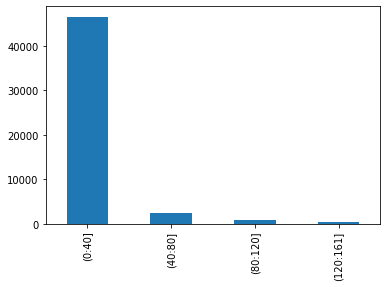

In [266]:
bins = [0, 40, 80, 120, 161]
labels = ['(0:40]', '(40:80]', '(80:120]', '(120:161]']
data['diff_ranges'] = pd.cut(x = data["min_diff"], bins = bins, labels = labels, include_lowest = True)
data['diff_ranges'].value_counts()[:5].plot(kind='bar')

In [ ]:
data["SIGLADES"].value_counts()

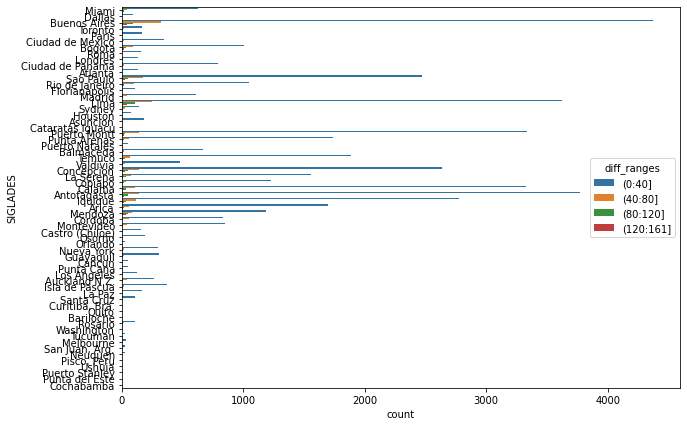

In [267]:
import seaborn as sns

fig = plt.figure(1, figsize=(10,7))
ax = sns.countplot(y="SIGLADES", hue='diff_ranges', data=data)
plt.show()

<AxesSubplot:>

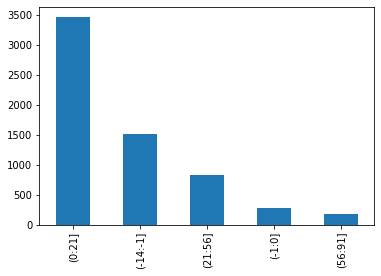

In [238]:
data[data['SIGLADES'] == 'Buenos Aires']['diff_ranges'].value_counts()[:5].plot(kind='bar')

In [244]:
flights_with_delays = data[data['diff_ranges'] != '(-1:0]']
flights_without_delays = data[data['diff_ranges'] == '(-1:0]']